# Results: Annual Maximum, Daily Precipitation Depth

Compare the simulated maximum daily precipitation depth on an annual basis to the datasets

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
SIM_ROOT = "DC_WGMN4"
AMAX_ROOT = "%s_%s_PreAnnTot_npa.pickle"
DP_DATA_IN = r'C:\Users\nmart\OneDrive\CC_IRD\Events\Process_Events\PRISM_Annual_Totals_1981-2010_npa.pickle'
P1_LOCA_IN = r'C:\Users\nmart\OneDrive\CC_IRD\Events\Process_Events\LOCA_Annual_Totals_2011-2040_npa.pickle'
P2_LOCA_IN = r'C:\Users\nmart\OneDrive\CC_IRD\Events\Process_Events\LOCA_Annual_Totals_2041-2070_npa.pickle'
P3_LOCA_IN = r'C:\Users\nmart\OneDrive\CC_IRD\Events\Process_Events\LOCA_Annual_Totals_2071-2100_npa.pickle'

In [4]:
OUT_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'

## Load

### Data and LOCA

In [5]:
with open( DP_DATA_IN, 'rb' ) as IP:
    npPAnn = pickle.load( IP )
npPAnn.max()

1154.6359

In [6]:
with open( P1_LOCA_IN, 'rb' ) as IP:
    LOCA_P1 = pickle.load( IP )
LOCA_P1.max()

1256.4879

In [7]:
with open( P2_LOCA_IN, 'rb' ) as IP:
    LOCA_P2 = pickle.load( IP )
LOCA_P2.max()

1369.5848

In [8]:
with open( P3_LOCA_IN, 'rb' ) as IP:
    LOCA_P3 = pickle.load( IP )
LOCA_P3.max()

1234.8926

### Simulation Results

In [9]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "DP", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    DP_SimAr = pickle.load( IP )
DP_SimAr.max(), DP_SimAr.min()

(1447.1616, 92.61681)

In [10]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "P1", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P1_SimAr = pickle.load( IP )
P1_SimAr.max(), P1_SimAr.min()

(1688.413, 134.35292)

In [11]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "P2", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P2_SimAr = pickle.load( IP )
P2_SimAr.max(), P2_SimAr.min()

(1737.6711, 136.66557)

In [12]:
InFile = os.path.normpath( os.path.join( IN_DIR, AMAX_ROOT % ( "P3", SIM_ROOT ) ) )
with open( InFile, 'rb' ) as IP:
    P3_SimAr = pickle.load( IP )
P3_SimAr.max(), P3_SimAr.min()

(1631.3445, 138.83339)

## Make Plotting DataFrames

In [13]:
NumPRISM = npPAnn.shape[0]
NumPRISM

30

In [14]:
NumP1_LOCA = LOCA_P1.shape[0]
NumP1_LOCA

1920

In [15]:
NumP2_LOCA = LOCA_P2.shape[0]
NumP2_LOCA

1920

In [16]:
NumP3_LOCA = LOCA_P3.shape[0]
NumP3_LOCA

1856

In [17]:
NumDP_Sim = DP_SimAr.shape[0]
NumDP_Sim

310000

In [18]:
NumP1_Sim = P1_SimAr.shape[0]
NumP1_Sim

300000

In [19]:
NumP2_Sim = P2_SimAr.shape[0]
NumP2_Sim

300000

In [20]:
NumP3_Sim = P3_SimAr.shape[0]
NumP3_Sim

300000

In [21]:
PRISM_Labels = [ "PRISM" for x in range( NumPRISM ) ]
LOCA_P1_Labels = [ "LOCA" for x in range( NumP1_LOCA ) ]
LOCA_P2_Labels = [ "LOCA" for x in range( NumP2_LOCA ) ]
LOCA_P3_Labels = [ "LOCA" for x in range( NumP3_LOCA ) ]
SimDP_Labels = [ "Simulated" for x in range( NumDP_Sim ) ]
SimP1_Labels = [ "Simulated" for x in range( NumP1_Sim ) ]
SimP2_Labels = [ "Simulated" for x in range( NumP2_Sim ) ]
SimP3_Labels = [ "Simulated" for x in range( NumP3_Sim ) ]

In [22]:
AllLabels = deepcopy( PRISM_Labels )
AllLabels.extend( SimDP_Labels)
AllLabels.extend( LOCA_P1_Labels )
AllLabels.extend( SimP1_Labels )
AllLabels.extend( LOCA_P2_Labels )
AllLabels.extend( SimP2_Labels )
AllLabels.extend( LOCA_P3_Labels )
AllLabels.extend( SimP3_Labels )
DPTotLen = len( AllLabels )
DPTotLen

1215726

In [23]:
Interval_PRISM_DP = [ "1981-2010" for x in range( NumPRISM ) ]
Interval_LOCA_P1 = [ "2011-2040" for x in range( NumP1_LOCA ) ] 
Interval_LOCA_P2 = [ "2041-2070" for x in range( NumP2_LOCA ) ] 
Interval_LOCA_P3 = [ "2071-2100" for x in range( NumP3_LOCA ) ] 
Interval_SIM_DP = [ "1981-2010" for x in range( NumDP_Sim ) ]
Interval_SIM_P1 = [ "2011-2040" for x in range( NumP1_Sim) ] 
Interval_SIM_P2 = [ "2041-2070" for x in range( NumP2_Sim ) ] 
Interval_SIM_P3 = [ "2071-2100" for x in range( NumP3_Sim ) ]

In [24]:
AllIntervals = deepcopy( Interval_PRISM_DP )
AllIntervals.extend( Interval_SIM_DP )
AllIntervals.extend( Interval_LOCA_P1 )
AllIntervals.extend( Interval_SIM_P1 )
AllIntervals.extend( Interval_LOCA_P2 )
AllIntervals.extend( Interval_SIM_P2 )
AllIntervals.extend( Interval_LOCA_P3 )
AllIntervals.extend( Interval_SIM_P3 )

In [25]:
AllValues = np.concatenate( [ npPAnn, DP_SimAr, LOCA_P1, P1_SimAr, LOCA_P2, P2_SimAr, LOCA_P3, P3_SimAr ], axis=0 )
AllValues.shape

(1215726,)

In [26]:
DataDict = { "Interval" :AllIntervals,
             "DLabel" : AllLabels,
             "AnnTot" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

Now save this DataFrame in case want to used it later for plotting

In [27]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "SimDF_%s_AnnTotPre_All.pickle" % SIM_ROOT ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

## Plots

In [28]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [29]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_AnnTot_%s_BW.svg" % SIM_ROOT) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\Results_AnnTot_DC_WGMN4_BW.svg'

In [30]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Results_AnnTot_%s_BW.png" % SIM_ROOT) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\Results_AnnTot_DC_WGMN4_BW.png'

In [31]:
preTicks = [ 100.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0 ]

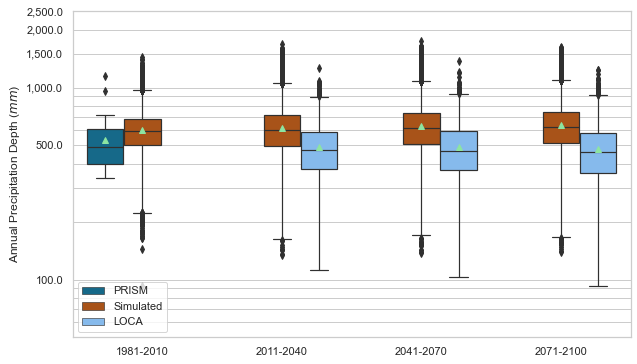

In [32]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
g1 = sns.boxplot( x="Interval", y="AnnTot", hue="DLabel",
                    dodge=True, linewidth=1.2, orient="v", showmeans=True,
                    palette={ "PRISM" : "xkcd:ocean blue", 
                              "LOCA" : "xkcd:sky blue",
                              "Simulated" : "xkcd:burnt orange", },
                    data=DPDF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="lower left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Annual Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 50.0, 2500.0 ))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
#Fig1.savefig( OutSVG )
#Fig1.savefig( OutPNG )